<h1><strong><u>Final Digit Model</u></strong></h1>

In [4]:
%%capture
%run KNNDigitClassifier.ipynb
%run LogisticDigitClassifier.ipynb
%run MLPDigitClassifier.ipynb
%run NaiveBayesDigitClassifier.ipynb

In [5]:
knn_classifier = knn_digit_classifier()
log_classifier = log_digit_classifier()
mlp_classifier = mlp_digit_classifier()
nb_classifier = nb_digit_classifier()

print(knn_classifier, log_classifier, mlp_classifier, nb_classifier)

Pipeline(steps=[('clf', KNeighborsClassifier(n_neighbors=3))]) Pipeline(steps=[('clf',
                 LogisticRegression(C=130, max_iter=1000, random_state=1))]) Pipeline(steps=[('clf',
                 MLPClassifier(hidden_layer_sizes=(28,), max_iter=5000,
                               random_state=1))]) GaussianNB()


<h2><strong><u>Final Model Selection</u></strong></h2>

<h3><strong><u>Cross-Validation Test</u></strong></h3>

In [6]:
pipeline = Pipeline(
    [
        ("clf", None)
    ]
)
param_grid = {"clf": [knn_classifier, log_classifier, mlp_classifier, nb_classifier]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters:  {'clf': Pipeline(steps=[('clf', KNeighborsClassifier(n_neighbors=3))])}


<h2><strong><u>Final Model Testing</u></strong></h2>

<h3><strong><u>Performance Metrics</u></strong></h3>

In [7]:
for key, value in clf_metrics.items():
    print(f"{key}")
    log_test_values = cross_val_score(knn_classifier, X_test, y=y_test, scoring=value, cv=5)
    print(f"CV Test Scores: ", log_test_values)
    np_log_test_values = np.array(log_test_values)
    average = np.mean(np_log_test_values)
    stDev = np.std(np_log_test_values)
    print(f"Average and Standard Error: ", "{:.2f}%".format(average.round(2)), "\u00B1", "{:.2f}%".format(stDev.round(4)*100), "\n")

Accuracy
CV Test Scores:  [0.97777778 0.93333333 0.98888889 0.95555556 1.        ]
Average and Standard Error:  0.97% ± 2.39% 

Precision (Micro)
CV Test Scores:  [0.97777778 0.93333333 0.98888889 0.95555556 1.        ]
Average and Standard Error:  0.97% ± 2.39% 

Recall (Micro)
CV Test Scores:  [0.97777778 0.93333333 0.98888889 0.95555556 1.        ]
Average and Standard Error:  0.97% ± 2.39% 



Text(0.5, 1.0, 'Final Clickbait Classifier: Confusion Matrix (Test)')

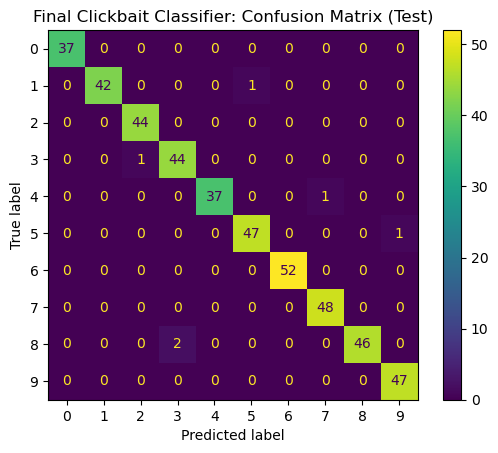

In [9]:
#Testing Confusion Matrix
test_predictions = best_model.predict(X_test)
disp = ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
disp.ax_.set_title("Final Clickbait Classifier: Confusion Matrix (Test)")

<h2><strong><u>Final Thoughts</u></strong></h2>
After running the test metrics on the final selected model, I recorded good results for the tests. I found that the final model is good at distinguishing both the positive and the negative class from each other. Considering the results of the experiment, I believe this model can used for clickbait classification.